# Classification

In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


## Linear Regression

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model

In [8]:
df = pd.read_csv('Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv')
df.drop('Community Area Number', axis=1, inplace=True)
df.drop('COMMUNITY AREA NAME', axis=1, inplace=True)

df.drop(77, inplace=True)
df.head()

,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [9]:
print(df.columns)

Index(['PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX'],
      dtype='object')


In [58]:
print(df.shape)

(77, 7)


### Feature Selection

#### Method 1: Itterate combinations

In [10]:
from itertools import combinations
from sklearn.metrics import r2_score, mean_absolute_error

# attributes
all_attributes = ['PERCENT AGED 16+ UNEMPLOYED', 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA', 'PERCENT HOUSEHOLDS BELOW POVERTY']

# Set initial values
best_r_squared = -1
best_mae = float('inf')
best_attributes = None

# Iterate over all possible combinations of attributes
for r in range(1, len(all_attributes) + 1):
    for combo in combinations(all_attributes, r):
        # Select the current combination of attributes
        selected_attributes = list(combo)

        # Split the data
        X = df[selected_attributes]
        y = df['HARDSHIP INDEX']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

        reg = linear_model.LinearRegression()
        reg.fit(X_train, y_train)

        predictions = reg.predict(X_test)

        # Calculate R-squared
        current_r_squared = r2_score(y_test, predictions)

        # Calculate MAE
        current_mae = mean_absolute_error(y_test, predictions)

        # Check if the current combination is better
        if current_r_squared > best_r_squared and current_mae < best_mae:
            best_r_squared = current_r_squared
            best_mae = current_mae
            best_attributes = selected_attributes

# Print the best results
print(f"Best R-squared: {best_r_squared}")
print(f"Best MAE: {best_mae}")
print(f"Best Attributes: {best_attributes}")

Best R-squared: 0.9661965587479443
Best MAE: 4.114016364931154
Best Attributes: ['PERCENT AGED 16+ UNEMPLOYED', 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA', 'PERCENT HOUSEHOLDS BELOW POVERTY']


#### Method 2: Lasso for feature selection

In [11]:
from sklearn.linear_model import Lasso

In [50]:
A = df.drop(['HARDSHIP INDEX', 'PER CAPITA INCOME '], axis=1).values
b = df['HARDSHIP INDEX'].values
names = df.drop(['HARDSHIP INDEX', 'PER CAPITA INCOME '], axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(A, b).coef_

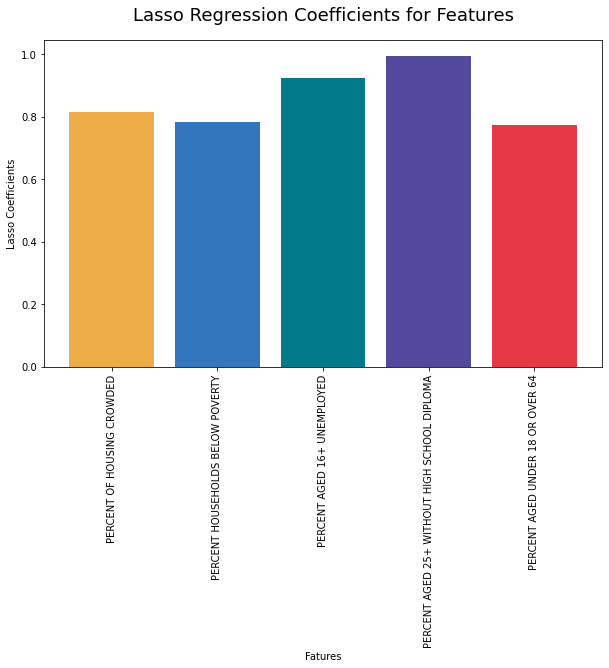

In [57]:
plt.figure(figsize=(10,6))
bar_colors = ['#EDAE49', '#3376BD', '#00798C', '#52489C', '#E63948']
plt.bar(names, lasso_coef, color=bar_colors)
plt.xticks(rotation=90)
plt.title('Lasso Regression Coefficients for Features', fontsize=18, pad=20)
plt.ylabel('Lasso Coefficients')
plt.xlabel('Fatures')
plt.show()

## Measure Performance

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
from sklearn.metrics import r2_score
#  proportion of the variance in the dependent variable that is predictable from the independent variables
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

R-squared: 0.9661965587479443


In [15]:
# the average absolute difference between the predicted and actual values.
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 4.114016364931154


In [16]:
import numpy as np
actual = np.array(y_test)
pred = np.array(predictions)
rmse = np.sqrt(np.mean((actual-pred) ** 2))
print(rmse)

5.444530229324196


## Visualizations

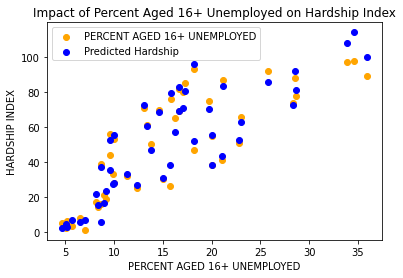

In [17]:
import matplotlib.pyplot as plt

x_1 = X_test.iloc[:, 0]
x_2 = X_test.iloc[:, 1]
x_3 = X_test.iloc[:, 2]

# Plotting- x, y
plt.scatter(x_1, y_test, color='orange', label='PERCENT AGED 16+ UNEMPLOYED')
plt.scatter(x_1, predictions, color='blue', label='Predicted Hardship')

plt.xlabel('PERCENT AGED 16+ UNEMPLOYED')
plt.ylabel('HARDSHIP INDEX')
plt.title('Impact of Percent Aged 16+ Unemployed on Hardship Index')
plt.legend()
plt.show()

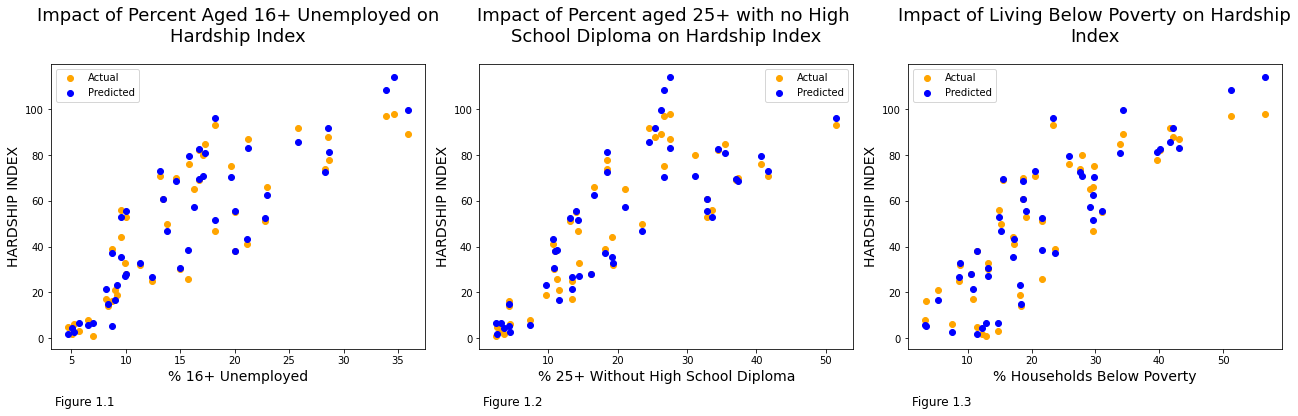

In [18]:
# 3 Feautures Selected
x_1 = X_test.iloc[:, 0]
x_2 = X_test.iloc[:, 1]
x_3 = X_test.iloc[:, 2]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.set_facecolor('#fff')

# PERCENT AGED 16+ UNEMPLOYED
axes[0].scatter(x_1, y_test, color='orange', label='Actual')
axes[0].scatter(x_1, predictions, color='blue', label='Predicted')
axes[0].set_xlabel('% 16+ Unemployed', fontsize=14)
axes[0].set_ylabel('HARDSHIP INDEX', fontsize=14)
axes[0].set_title('Impact of Percent Aged 16+ Unemployed on Hardship Index', wrap=True, fontsize=18, pad=25)
axes[0].legend()
axes[0].text(0.01, -0.20, 'Figure 1.1', transform=axes[0].transAxes, fontsize=12)

# PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA
axes[1].scatter(x_2, y_test, color='orange', label='Actual')
axes[1].scatter(x_2, predictions, color='blue', label='Predicted')
axes[1].set_xlabel('% 25+ Without High School Diploma', fontsize=14)
axes[1].set_ylabel('HARDSHIP INDEX', fontsize=14)
axes[1].set_title('Impact of Percent aged 25+ with no High \nSchool Diploma on Hardship Index', wrap=True, fontsize=18, pad=25)
axes[1].legend()
axes[1].text(0.01, -0.20, 'Figure 1.2', transform=axes[1].transAxes, fontsize=12)

# PERCENT HOUSEHOLDS BELOW POVERTY
axes[2].scatter(x_3, y_test, color='orange', label='Actual')
axes[2].scatter(x_3, predictions, color='blue', label='Predicted')
axes[2].set_xlabel('% Households Below Poverty', fontsize=14) 
axes[2].set_ylabel('HARDSHIP INDEX', fontsize=14)
axes[2].set_title('Impact of Living Below Poverty on Hardship Index', wrap=True, fontsize=18, pad=25)
axes[2].legend()
axes[2].text(0.01, -0.20, 'Figure 1.3', transform=axes[2].transAxes, fontsize=12)

plt.tight_layout()

plt.show()

# Decision Tree

## Decision Tree Regressor

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
dt_regressor = DecisionTreeRegressor(max_depth=3)

dt_regressor.fit(X_train, y_train)

predictions2 = dt_regressor.predict(X_test)

## Measure Performance

In [21]:
mse = mean_squared_error(y_test, predictions2)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 144.76475177304965


In [22]:
# the average absolute difference between the predicted and actual values.
mae = mean_absolute_error(y_test, predictions2)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 9.609219858156028


In [23]:
r2 = r2_score(y_test, predictions2)
print(f"R-squared: {r2}")

R-squared: 0.8349167852277991


In [24]:
pred2 = np.array(predictions2)
rmse2 = np.sqrt(np.mean((actual-pred2) ** 2))
print(rmse2)

12.031822462663321


In [25]:
from scipy import stats
t_statistic, p_value = stats.ttest_rel([rmse], [rmse2])
p_value

C:\Users\Owner\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Owner\anaconda3\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

## Visualizations

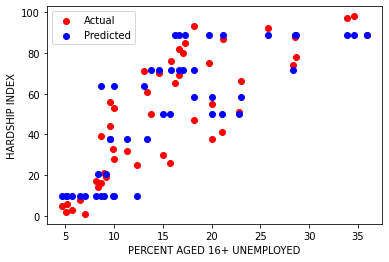

In [26]:
plt.scatter(X_test.iloc[:, 0], y_test, color='red', label='Actual')
plt.scatter(X_test.iloc[:, 0], predictions2, color='blue', label='Predicted')
plt.xlabel('PERCENT AGED 16+ UNEMPLOYED')
plt.ylabel('HARDSHIP INDEX')
plt.legend()
plt.show()

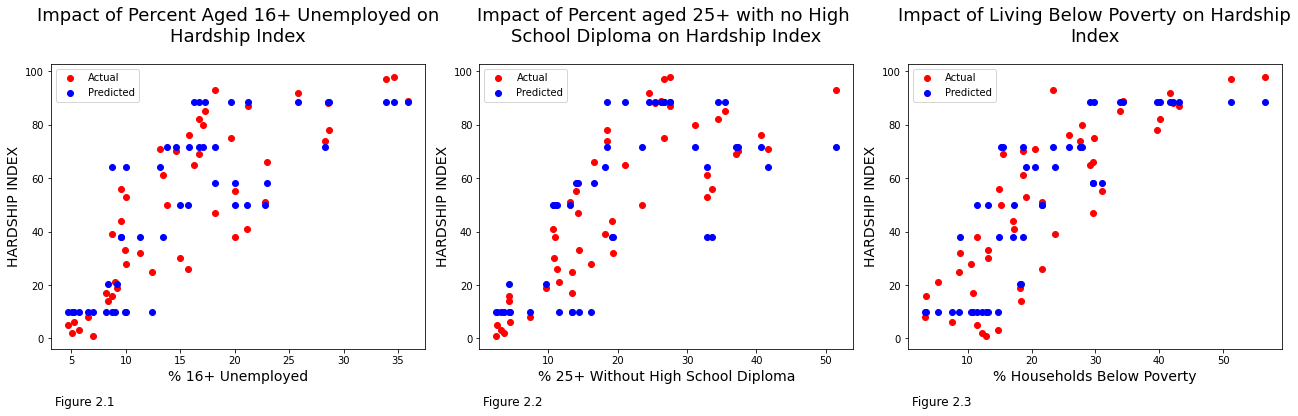

In [27]:
# 3 Feautures Selected
x_1 = X_test.iloc[:, 0]
x_2 = X_test.iloc[:, 1]
x_3 = X_test.iloc[:, 2]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.set_facecolor('#fff')

# PERCENT AGED 16+ UNEMPLOYED
axes[0].scatter(x_1, y_test, color='red', label='Actual')
axes[0].scatter(x_1, predictions2, color='blue', label='Predicted')
axes[0].set_xlabel('% 16+ Unemployed', fontsize=14)
axes[0].set_ylabel('HARDSHIP INDEX', fontsize=14)
axes[0].set_title('Impact of Percent Aged 16+ Unemployed on Hardship Index', wrap=True, fontsize=18, pad=25)
axes[0].legend()
axes[0].text(0.01, -0.20, 'Figure 2.1', transform=axes[0].transAxes, fontsize=12)

# PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA
axes[1].scatter(x_2, y_test, color='red', label='Actual')
axes[1].scatter(x_2, predictions2, color='blue', label='Predicted')
axes[1].set_xlabel('% 25+ Without High School Diploma', fontsize=14)
axes[1].set_ylabel('HARDSHIP INDEX', fontsize=14)
axes[1].set_title('Impact of Percent aged 25+ with no High \nSchool Diploma on Hardship Index', wrap=True, fontsize=18, pad=25)
axes[1].legend()
axes[1].text(0.01, -0.20, 'Figure 2.2', transform=axes[1].transAxes, fontsize=12)

# PERCENT HOUSEHOLDS BELOW POVERTY
axes[2].scatter(x_3, y_test, color='red', label='Actual')
axes[2].scatter(x_3, predictions2, color='blue', label='Predicted')
axes[2].set_xlabel('% Households Below Poverty', fontsize=14) 
axes[2].set_ylabel('HARDSHIP INDEX', fontsize=14)
axes[2].set_title('Impact of Living Below Poverty on Hardship Index', wrap=True, fontsize=18, pad=25)
axes[2].legend()
axes[2].text(0.01, -0.20, 'Figure 2.3', transform=axes[2].transAxes, fontsize=12)

plt.tight_layout()

plt.show()

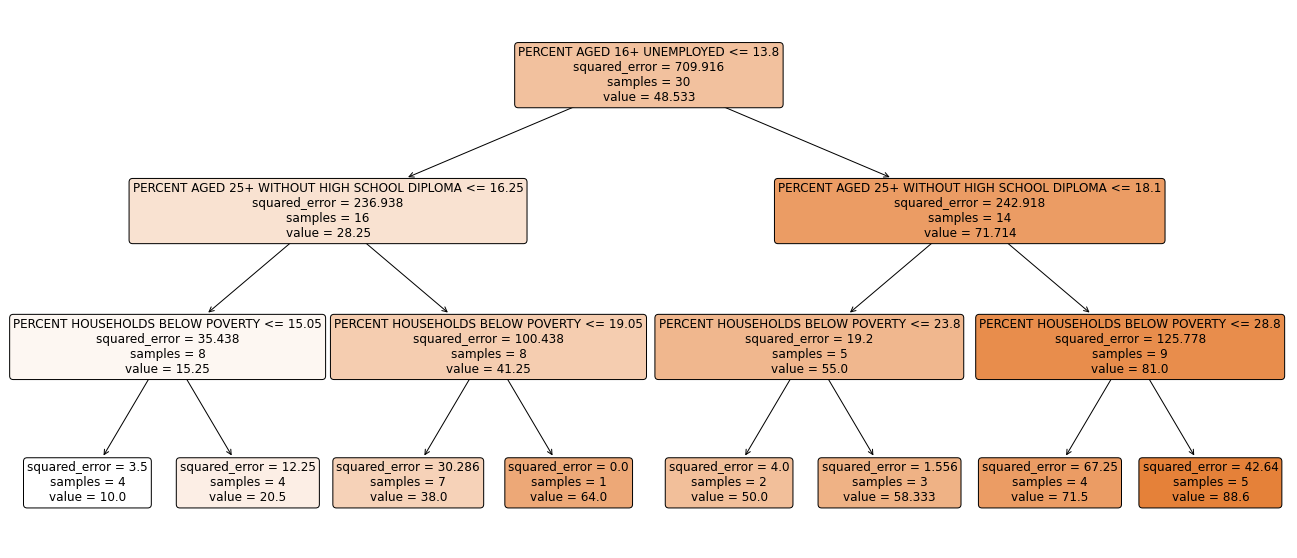

In [28]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

decision_tree = plt.figure(figsize=(23, 10))

plot_tree(dt_regressor, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=12)
decision_tree.set_facecolor('#fff')

plt.show()


# 2. Clustering

## Agglomerative Hierarchical Clustering

In [29]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

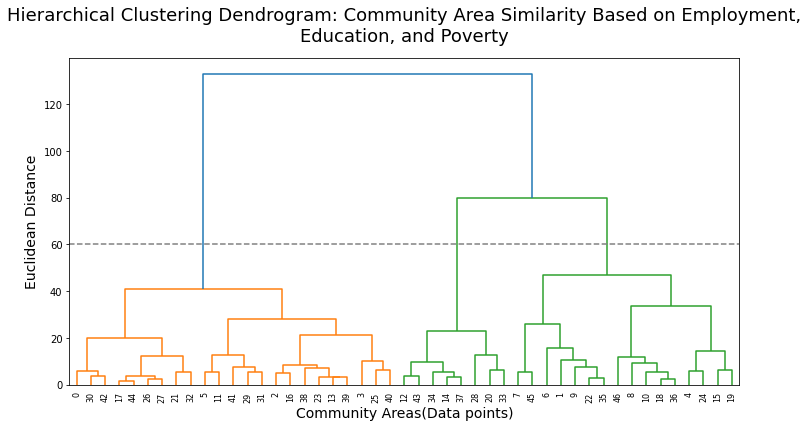

In [30]:
linkage_matrix1 = linkage(X_test, method='ward', metric='euclidean')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix1, leaf_rotation=90., leaf_font_size=8.)
plt.title('Hierarchical Clustering Dendrogram: Community Area Similarity Based on Employment, Education, and Poverty'
         , loc='center', fontsize=18, wrap=True, pad=20)
plt.xlabel('Community Areas(Data points)', fontsize=14)
plt.ylabel('Euclidean Distance', fontsize=14)
cutting_height = 60 
plt.axhline(y=cutting_height, color='gray', linestyle='--')
plt.show()

In [31]:
model = AgglomerativeClustering(n_clusters=2, linkage='ward', metric='euclidean')
clusters = model.fit_predict(X_test)

In [66]:
    print("-----------------------")
    print("Agglomerative Clustering")
    final = X_test.copy()
    final['Hardship Index'] = y_test
    final['Cluster'] = np.array(clusters)
    print(final.head(3).to_string(index=False))

-----------------------
Agglomerative Clustering
 PERCENT AGED 16+ UNEMPLOYED  PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  PERCENT HOUSEHOLDS BELOW POVERTY  Hardship Index  Cluster
                         5.2                                           4.5                               7.5             6.0        1
                        28.7                                          18.4                              39.7            78.0        0
                        12.4                                          13.4                               8.6            25.0        1


In [33]:
final.to_csv('cluster_data.csv', index=False)